# Decomposition/Factorization

Why is it useful to express something as a few parts multiplied together?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

x = np.random.uniform(0.1,5,100)
noise = np.random.normal(scale=0.3, size=x.size)

In [2]:
# at what points does y=0?
#y = -x**3 + 7*x**2 - 14*x + 8
y = (4-x) * (2-x) * (1-x)

# Matrix Multiplication

In [12]:
A = np.random.normal(size=(3, 7))
B = np.random.normal(size=(7, 14))
C = np.random.normal(size=(14, 123))
D = np.random.normal(size=(123, 33))

print(A.shape, B.shape, C.shape, D.shape)

(3, 7) (7, 14) (14, 123) (123, 33)


In [13]:
(A @ B @ C @ D).shape

(3, 33)

# Decomposition with PCA 

In [15]:
df = pd.DataFrame(make_blobs(centers=3, random_state=320)[0], columns=["A", "B"])
df["C"] = df["A"] * 2
df["D"] = df["A"] - df["B"]
df.head()

,A,B,C,D
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [21]:
df.mean()

A     6.079707
B    -1.523008
C    12.159413
D     7.602715
dtype: float64

In [22]:
p = PCA()
W = p.fit_transform(df) # weights
C = p.components_
p.mean_

array([ 6.0797066 , -1.5230081 , 12.15941319,  7.60271469])

In [18]:
print(W.shape, C.shape)
df.shape

(100, 4) (4, 4)


(100, 4)

In [24]:
pd.DataFrame(W @ C + p.mean_).head()

,0,1,2,3
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [25]:
df.head()

,A,B,C,D
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [26]:
# what's cool:
# the first columns of W are "most important"
# the first rows of C are "most important"

In [29]:
W[:, :2].shape

(100, 2)

In [35]:
C[:2, :].shape

(2, 4)

In [34]:
pd.DataFrame(W[:, :2] @ C[:2, :] + p.mean_).head()

,0,1,2,3
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [36]:
df.head()

,A,B,C,D
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [37]:
pd.DataFrame(W[:, :1] @ C[:1, :] + p.mean_).head()

,0,1,2,3
0,4.415707,-0.880229,8.831414,5.295936
1,1.903025,0.090383,3.806050,1.812642
2,10.036329,-3.051394,20.072658,13.087723
3,5.011442,-1.110353,10.022883,6.121795
4,5.832180,-1.427392,11.664360,7.259572


In [40]:
C.shape

(4, 4)

In [39]:
p.explained_variance_ratio_.round(3)

array([0.773, 0.227, 0.   , 0.   ])

# Explained Variance

In [50]:
df.values.reshape(-1).var()

42.542575093552266

In [41]:
a = np.array([0.9,2.1,2.9])
a

array([0.9, 2.1, 2.9])

In [42]:
b = np.array([1,2,3])
b

array([1, 2, 3])

In [43]:
a.var()

0.6755555555555555

In [44]:
(a - b).var()

0.0088888888888889

In [46]:
1 - (a - b).var() / a.var()

0.9868421052631579

Text(0.5, 0, 'Component Count')

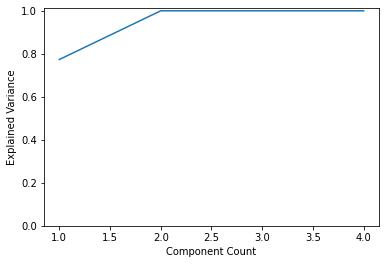

In [55]:
s = pd.Series(p.explained_variance_ratio_.cumsum(), index=range(1,5))
ax = s.plot.line(ylim=0)
ax.set_ylabel("Explained Variance")
ax.set_xlabel("Component Count")

# Feature Dimensionality Reduction

In [65]:
p = PCA(2)  # exact int for component count; float gives desired explained variance
W = p.fit_transform(df) # weights
C = p.components_
m = p.mean_

In [66]:
pd.DataFrame(C)

,0,1,2,3
0,0.376062,-0.145267,0.752124,0.521329
1,-0.200986,-0.724122,-0.401973,0.523135


In [70]:
pd.DataFrame(W).head(3)

,0,1
0,-4.424802,-3.808312
1,-11.106364,-3.068153
2,10.521197,-0.399549


In [71]:
-4.424802 * C[0] + -3.808312 * C[1] + m

array([ 5.18112571,  1.87745153, 10.36225143,  3.30367418])

In [67]:
df

,A,B,C,D
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293
...,...,...,...,...
95,5.678593,-4.296015,11.357186,9.974608
96,4.861621,-5.922901,9.723241,10.784522
97,9.778808,-1.298636,19.557615,11.077444
98,2.813070,0.787750,5.626139,2.025319


In [74]:
pipe = Pipeline([
    ("pca", PCA(2)),
    ("km", KMeans(3)),
])

pipe.fit(df) # fit the PCA, use PCA to transform, fit KM to transformed data
groups = pipe.predict(df) # use PCA to transform, predict using KM on transformed data

Text(0, 0.5, 'Principal Component 2')

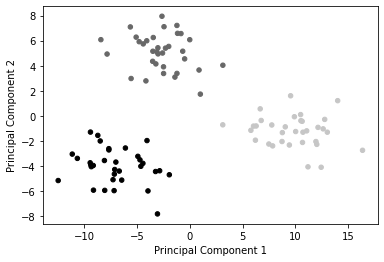

In [84]:
transformed = pd.DataFrame(pipe["pca"].transform(df))
# -1 is white
ax = transformed.plot.scatter(x=0, y=1, c=groups, vmin=-1)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")

# Lossy Compression

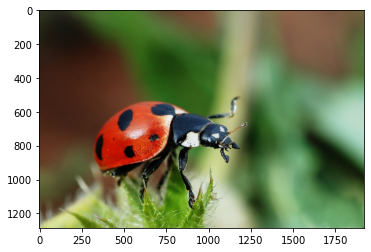

In [86]:
img = plt.imread("bug.jpg")
plt.imshow(img)

In [87]:
img.shape

(1286, 1920, 3)

In [88]:
img = img.mean(axis=2)
img.shape

(1286, 1920)

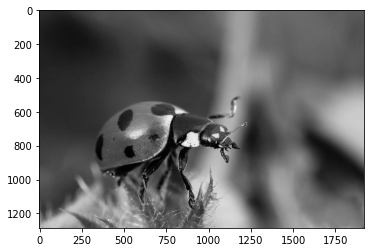

In [90]:
plt.imshow(img, cmap="gray")

In [107]:
p = PCA(0.98)
W = p.fit_transform(img)
C = p.components_
m = p.mean_

In [110]:
C.shape

(103, 1920)

In [111]:
# compression ratio
compressed_size = len(W.reshape(-1)) + len(C.reshape(-1)) + len(m)
len(img.reshape(-1)) / compressed_size

7.434018389946347

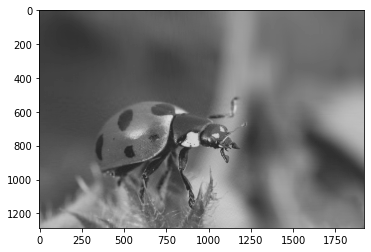

In [109]:
plt.imshow(W @ C + m, cmap="gray")

In [113]:
with open("img1.npz", "wb") as f:
    np.savez(f, img)

In [114]:
with open("img2.npz", "wb") as f:
    np.savez(f, W, C, m)

In [117]:
!ls -lh

total 31M
-rw-rw-r-- 1 trh trh 285K Apr 30 19:21 bug.jpg
-rw-rw-r-- 1 trh trh 7.1M May  3 19:20 img.npz
-rw-rw-r-- 1 trh trh  19M May  4 16:36 img1.npz
-rw-rw-r-- 1 trh trh 2.6M May  4 16:37 img2.npz
-rw-rw-r-- 1 trh trh 429K May  4 14:28 lec1.ipynb
-rw-rw-r-- 1 trh trh 370K May  4 16:36 lec2.ipynb
-rw-rw-r-- 1 trh trh 416K May  3 19:22 starter-Copy1.ipynb
-rw-rw-r-- 1 trh trh 156K Apr 30 19:21 starter.ipynb


In [118]:
with np.load("img2.npz") as f:
    W, C, m = f.values()

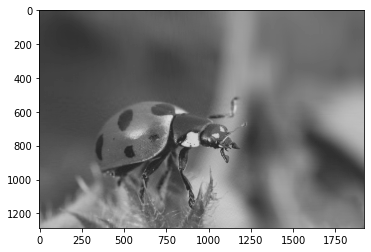

In [120]:
plt.imshow(W @ C + m, cmap="gray")